<a href="https://colab.research.google.com/github/LotfollahKarimi/Prediction-by-ARIMA/blob/main/Prediction_with_ARIMA_model_VM_G4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
from google.colab import files

uploaded = files.upload()

Saving timeseries-detailed.csv to timeseries-detailed.csv


In [3]:
df = pd.read_csv("timeseries-detailed.csv")
df.head()

,date,work_days,managed_VM_G1,managed_VM_G2,managed_VM_G3,managed_VM_G4,managed_VM_G5,managed_VM_G6,managed_VM_G7,failed_VM_G1,failed_VM_G2,failed_VM_G3,failed_VM_G4,failed_VM_G5,failed_VM_G6,failed_VM_G7
0,01/31/2017,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4048.0,NaN,4780.0,5.0,1707.0,NaN,2.0
1,02/28/2017,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3833.0,NaN,4793.0,2.0,1747.0,NaN,2.0
2,03/31/2017,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4114.0,NaN,5671.0,4.0,2146.0,NaN,4.0
3,04/30/2017,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3532.0,NaN,4805.0,3.0,2011.0,NaN,2.0
4,05/31/2017,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3758.0,NaN,4868.0,4.0,2164.0,NaN,1.0


In [4]:
df.shape

(84, 16)

In [5]:
from datetime import datetime, date

df['date'] = pd.to_datetime(df['date'],)
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,date,work_days,managed_VM_G1,managed_VM_G2,managed_VM_G3,managed_VM_G4,managed_VM_G5,managed_VM_G6,managed_VM_G7,failed_VM_G1,failed_VM_G2,failed_VM_G3,failed_VM_G4,failed_VM_G5,failed_VM_G6,failed_VM_G7
0,2017-01-31 00:00:00,21,nan,nan,nan,nan,nan,nan,nan,4048.000000,nan,4780.000000,5.000000,1707.000000,nan,2.000000
1,2017-02-28 00:00:00,19,nan,nan,nan,nan,nan,nan,nan,3833.000000,nan,4793.000000,2.000000,1747.000000,nan,2.000000
2,2017-03-31 00:00:00,23,nan,nan,nan,nan,nan,nan,nan,4114.000000,nan,5671.000000,4.000000,2146.000000,nan,4.000000
3,2017-04-30 00:00:00,20,nan,nan,nan,nan,nan,nan,nan,3532.000000,nan,4805.000000,3.000000,2011.000000,nan,2.000000
4,2017-05-31 00:00:00,22,nan,nan,nan,nan,nan,nan,nan,3758.000000,nan,4868.000000,4.000000,2164.000000,nan,1.000000


In [27]:
df1 = df.iloc[: , [0,1,12]]
df1

,date,work_days,failed_VM_G4
0,2017-01-31,21,5.0
1,2017-02-28,19,2.0
2,2017-03-31,23,4.0
3,2017-04-30,20,3.0
4,2017-05-31,22,4.0
...,...,...,...
79,2023-08-31,23,325.0
80,2023-09-30,21,NaN
81,2023-10-31,22,NaN
82,2023-11-30,22,NaN


In [35]:
df1.dropna(subset=['failed_VM_G4'], inplace=True)
df1.isnull().sum()


<ipython-input-35-12ec1bb688bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['failed_VM_G4'], inplace=True)


date               0
work_days          0
failed_VM_G4       0
Ratio_Failed_G4    0
dtype: int64

In [40]:
df1['Ratio_Failed_G4'] = df1['failed_VM_G4'] / df1['work_days'] *10
df1

<ipython-input-40-f14f1f8f0f74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Ratio_Failed_G4'] = df1['failed_VM_G4'] / df1['work_days'] *10


,date,work_days,failed_VM_G4,Ratio_Failed_G4
0,2017-01-31,21,5.0,2.380952
1,2017-02-28,19,2.0,1.052632
2,2017-03-31,23,4.0,1.739130
3,2017-04-30,20,3.0,1.500000
4,2017-05-31,22,4.0,1.818182
...,...,...,...,...
75,2023-04-30,20,434.0,217.000000
76,2023-05-31,23,460.0,200.000000
77,2023-06-30,22,347.0,157.727273
78,2023-07-31,21,339.0,161.428571


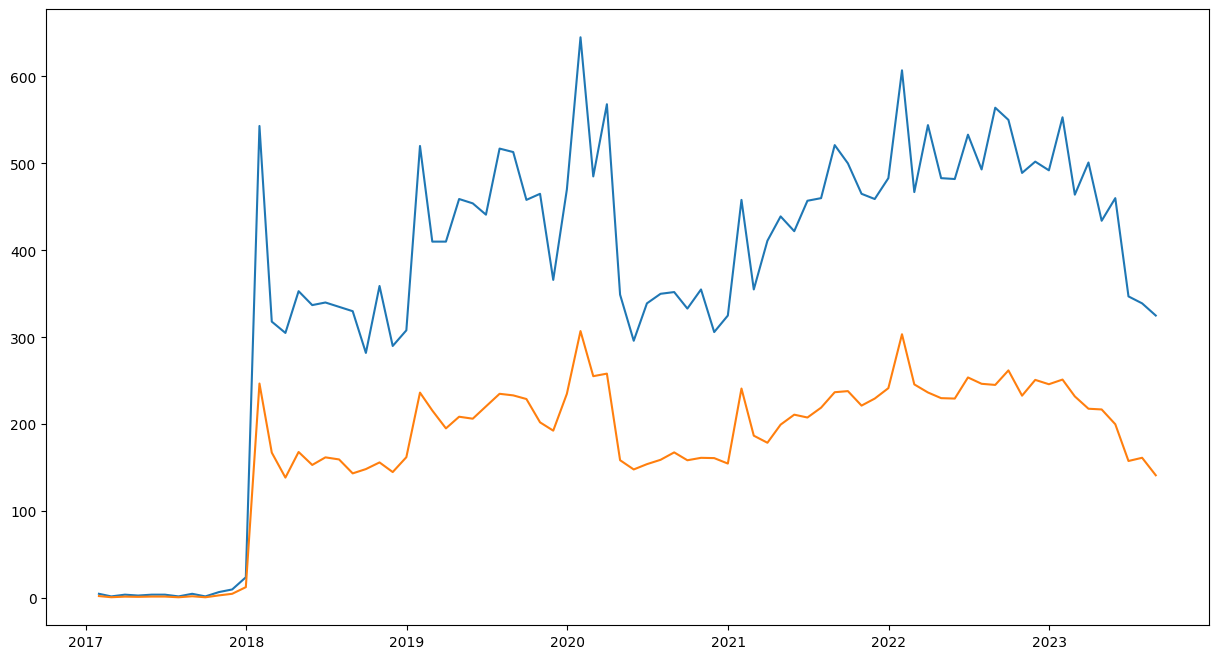

In [41]:
# importing the module
import matplotlib.pyplot as plt
# setting the size
plt.figure(figsize=(15,8))
# plotting the graph
plt.plot(df1.date, df1.failed_VM_G4)
plt.plot(df1.date, df1.Ratio_Failed_G4)
plt.show()

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

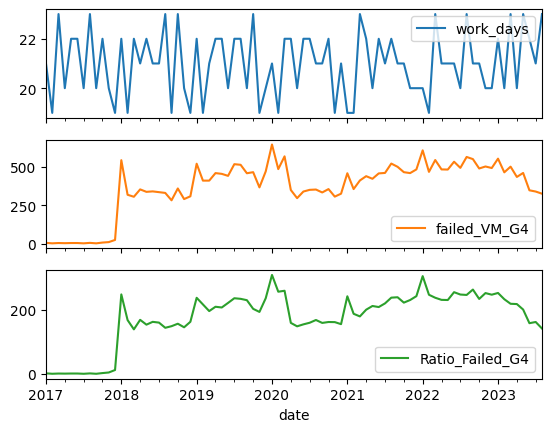

In [52]:
el_df1=df1.set_index('date')
el_df1.plot(subplots=True)

In [43]:
from statsmodels.tsa.stattools import adfuller

def adf_test(Trainingdf):
    result=adfuller(Trainingdf)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")

adf_test(df1['Ratio_Failed_G4'])

Test parameters : -1.4194306161206736
p-value : 0.5729262062806969
#Lags Used : 12
Dataset observations : 67
Dataset is non-stationary 


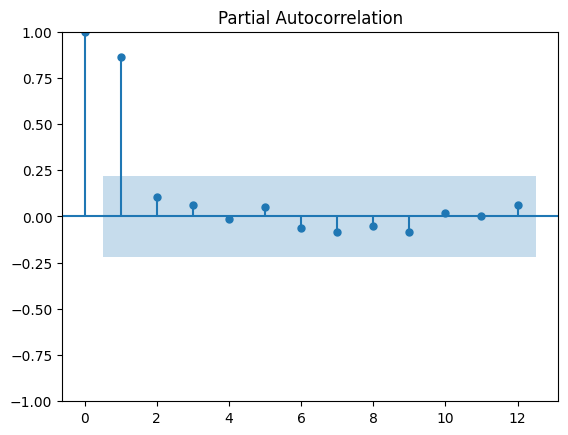

In [46]:
# Partial Autocorrelation (PACF) plot to find AR term (p)

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df1['Ratio_Failed_G4'], lags=12)
pyplot.show()


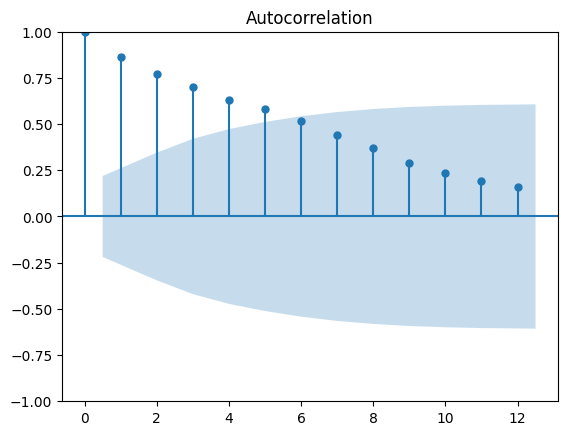

In [51]:
#find the order of the MA term (q)
#MA term is the error of the lagged forecast.
#ACF tells how many MA terms are required to remove autocorrelation

from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1['Ratio_Failed_G4'], lags=12)
pyplot.show()

In [53]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.3 MB/s eta 0:00:00


In [54]:
import pmdarima as pm

In [56]:
model = pm.auto_arima(df1['Ratio_Failed_G4'],
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=782.282, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=804.248, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=786.531, Time=0.89 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=793.177, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=802.415, Time=0.09 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=795.260, Time=1.15 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=787.788, Time=0.48 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.97 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=782.412, Time=0.88 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=793.446, Time=0.38 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=784.185, Time=0.41 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=781.315, Time=0.35 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=794.082, Time=0.20 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AI

In [59]:
train=df1[(df1.index.get_level_values(0) >= '2017-01-31') & (df1.index.get_level_values(0) <= '2022-01-31')]

TypeError: ignored

In [60]:
test=df1[(df1.index.get_level_values(0) > '2022-01-31')]


TypeError: ignored

In [ ]:
test.shape

In [ ]:
model.fit(train['Ratio_Failed'])

In [ ]:
forecast=model.predict(n_periods=51, return_conf_int=True)
forecast

In [ ]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])
forecast_df